# AI算法工程师
## 毕业项目
### 猫狗识别

## 1.简介
深度学习中最突出的问题之一是图像分类。图像分类的目的是根据潜在的类别对特定的图像进行分类。图像分类的一个经典示例是在一组图像中识别猫和狗。
近年来深度学习在图像分类和目标检测上取得了巨大的进步
本项目将介绍如何使用自定义神经网络解决图像分类问题（猫狗），对于测试集中的每个图像，预测该图像是狗的概率（1 =狗，0 =猫）, 同时使用迁移学习方案做对比。
本文提供的实施方案基于使用Python编程语言的Pytorch。


### 1.1数据集加载
数据来源自https://www.kaggle.com/c/5441/download-all。 本项目使用train.zip和test.zip两个压缩包，train中包含25000张图像，其中猫和狗各12500张，test中包含12500张图像，以数字序号命名。

In [ ]:
!unzip -q 'data/test.zip'  -d 'data/'
!unzip -q 'data/train.zip' -d 'data/'

遍历train和test文件夹获取文件名列表

In [1]:
import os
train_path = 'data/train'
train_list = []
for each_file in os.listdir(train_path):
     train_list.append(os.path.join(train_path,each_file))

In [2]:
test_path = 'data/test'
test_list = []
for each_file in os.listdir(test_path):
     test_list.append(os.path.join(test_path,each_file))

### 1.2绘制样本图像

this is a dog


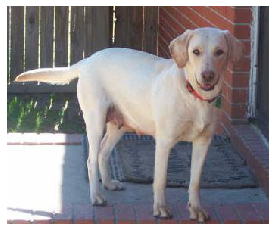

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#查看训练集中的图片
image = np.random.choice(train_list)
img = Image.open(image)
plt.imshow(img)
plt.axis('off')
print('this is a',image.split('/')[-1].split('.')[0])
plt.show()

In [28]:
img.size

(427, 500)

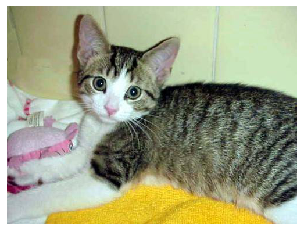

In [29]:
#查看测试集中的图片
image = np.random.choice(test_list)
img = Image.open(image)
plt.imshow(img)
plt.axis('off')
plt.show()

In [30]:
img.size

(499, 375)

In [5]:
train_list[:10]

['data/train/cat.0.jpg',
 'data/train/cat.1.jpg',
 'data/train/cat.10.jpg',
 'data/train/cat.100.jpg',
 'data/train/cat.1000.jpg',
 'data/train/cat.10000.jpg',
 'data/train/cat.10001.jpg',
 'data/train/cat.10002.jpg',
 'data/train/cat.10003.jpg',
 'data/train/cat.10004.jpg']

### 1.3数据探索

In [9]:
#标签包含在文件名中，需要提取
train_list[0].split('/')[-1].split('.')[0]

'cat'

In [10]:
path = train_list[0]
label = 0 if 'cat' in path.split('/')[-1] else 1
label

0

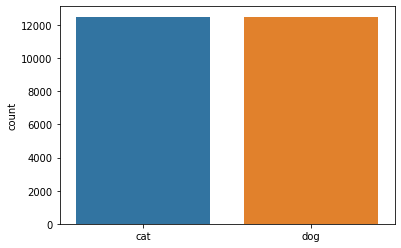

In [11]:
import seaborn as sns

count = []
for name in train_list:
    count.append(name.split('/')[-1].split('.')[0])
svm = sns.countplot(count);

In [15]:
figure = svm.get_figure()    
figure.savefig('svm_conf.png', dpi=400)


In [12]:
sizelist=[]
for image in train_list:
    img = Image.open(image)
    sizelist.append(img.size)

In [13]:
npsize = np.array(sizelist)

Text(0, 0.5, 'height')

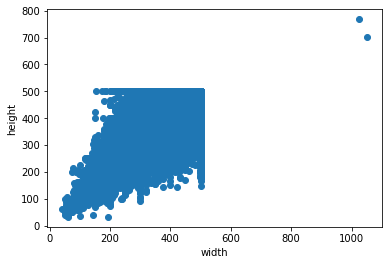

In [16]:
sizefig = plt.scatter(npsize[:,0],npsize[:,1]);
plt.xlabel('width')
plt.ylabel('height')

In [49]:
sizefig.get_figure().savefig('size.png', dpi=400)


In [17]:
sizelist=[]
for image in test_list:
    img = Image.open(image)
    sizelist.append(img.size)

In [18]:
npsize = np.array(sizelist)

Text(0, 0.5, 'height')

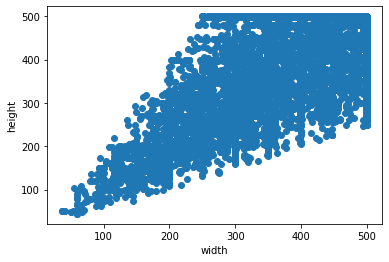

In [19]:
plt.scatter(npsize[:,0],npsize[:,1]);
plt.xlabel('width')
plt.ylabel('height')